In [1]:
%pylab inline
import serial
from tqdm import tqdm
import time


Populating the interactive namespace from numpy and matplotlib


In [2]:
ser = serial.Serial("COM7", baudrate=115200, timeout = 100)

In [3]:
meas_pos = False

In [5]:
ser.flushInput()
time.sleep(.2)
ser.flushInput()
time.sleep(.2)
ser.flushInput()
time.sleep(.2)
ser.flushInput()
print(ser.inWaiting())

sr = 500 # 500Hz samplerate
sample_time = 30*60

d_len = int(sample_time * sr)
d = zeros(d_len)
t = zeros(d_len)


line = ''
for i in tqdm(arange(d_len)):
    line = ser.read(3) #remove line end
    line_end = line[-1]
    while (line_end != ord('\n')):
        line_end = ser.read(1)[0]
        print("finding line end")
        print(line_end)
        
    d[i] = line[0] * 256 + line[1]
t = arange(len(d)) / sr

if meas_pos:
    pos_data = d / 4000 * 360
    pos_time = t

else:
    speed_data = d
    speed_t = t
    print("Average Speed: %f" %(average(d)))

0


100%|██████████| 900000/900000 [30:00<00:00, 500.00it/s]


Average Speed: 6095.923513


(0, 29.99996666666667)

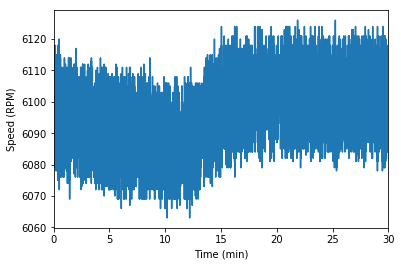

In [18]:
#Plot Time Data
avg = 1
t_avg = zeros(len(speed_data[::avg]))
s_avg = zeros(len(speed_data[::avg]))

for i in tqdm(arange(len(speed_data[::avg]))):
    t_avg[i] = average(t[i*avg:(i + 1)*avg])
    s_avg[i] = average(speed_data[i*avg:(i + 1)*avg])

plot(t_avg / 60, s_avg)
ylabel("Speed (RPM)")
xlabel("Time (min)")
# ylim(3420,3460)
xlim(0, t[-1] / 60)

Text(0,0.5,'Speed (RPM)')

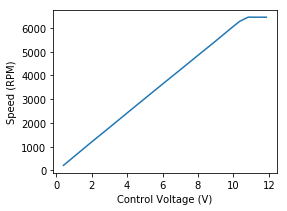

In [190]:
figure(figsize = (4,3))
long_data_Start_voltage = 10.077
long_data_Stop_voltage = 10.087


av_speeds = array([208.939, 594.568, 1197.9236, 1800.983, 2415.151, 3015.6466, 3664.3338, 4230.423, 4844.8958, 5431.1292, 6009.3586, 6270.0775, 6447.637, 6444.6181, 6444.094])
voltages = array([0.4015, 1.0224, 1.9991, 2.995, 3.998, 4.986, 6.055, 6.996, 8.009, 8.982, 9.917, 10.354, 10.840, 11.245, 11.865])

plot(voltages, av_speeds)

xlabel("Control Voltage (V)")
ylabel("Speed (RPM)")

Text(0.5,0,'Time (s)')

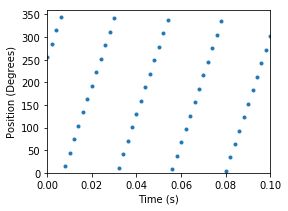

In [85]:
#Plot position data
figure(figsize = (4,3))
plot(pos_time , pos_data, '.')
ylabel("Position (Degrees)")
ylim(0, 360)
xlim(0, .1)
xlabel("Time (s)")


(0, 19.998)

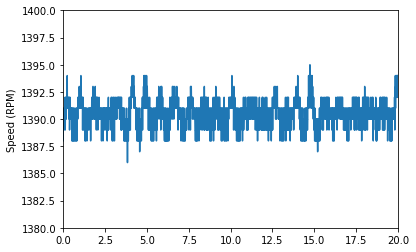

In [54]:
#Plot Time Data
plot(t, speed_data,)
ylabel("Speed (RPM)")
ylim(1380,1400)
xlim(0, t[-1])